In [11]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

In [3]:
data['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
categories = ['sci.space', 'talk.politics.guns', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [20]:
import pandas as pd
df = pd.DataFrame(train['data'], columns=['text'])
df.head()

,text
0,From: jgarland@kean.ucs.mun.ca\nSubject: Re: C...
1,From: rgc3679@bcstec.ca.boeing.com (Robert G. ...
2,From: xrcjd@mudpuppy.gsfc.nasa.gov (Charles J....
3,From: viking@iastate.edu (Dan Sorenson)\nSubje...
4,From: mbc@po.CWRU.Edu (Michael B. Comet)\nSubj...


In [13]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(train.data)

# Check Shape of Count Vector
X_train_counts.shape

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1723, 33453)

### Build the Model

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [17]:
# K-means clustering
k_values = range(2, 6)  # Trying different cluster numbers
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_counts)
    cluster_labels = kmeans.labels_
    
    # Calculating silhouette score to evaluate the clusters
    silhouette_avg = silhouette_score(X_train_counts, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


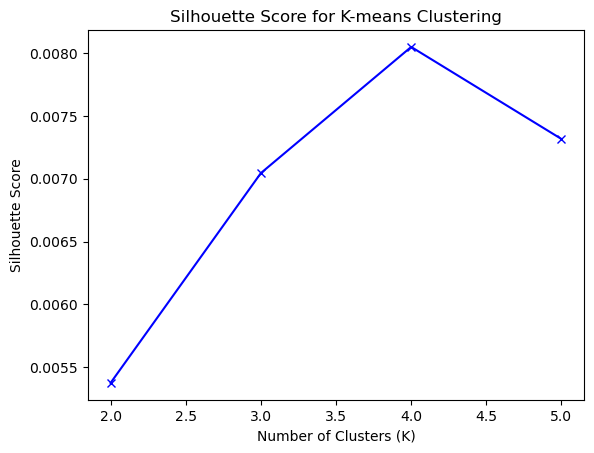

In [18]:
# Plotting silhouette scores for different K values
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.show()

In [21]:
# Choose the best K based on the plot or any other criteria
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Perform clustering with the best K
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_train_counts)
df['Cluster'] = kmeans.labels_

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Displaying the clusters
for cluster_id in range(best_k):
    print(f"Cluster {cluster_id}:")
    print(df[df['Cluster'] == cluster_id]['text'])
    print("--------------------")

Cluster 0:
3       From: viking@iastate.edu (Dan Sorenson)\nSubje...
5       From: kennejs@a.cs.okstate.edu (KENNEDY JAMES ...
14      From: jmd@cube.handheld.com (Jim De Arras)\nSu...
19      Subject: thanks to poster of NY Times article ...
20      From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...
                              ...                        
1708    From: awesley@vela.acs.oakland.edu (awesley)\n...
1712    From: hambidge@bms.com\nSubject: Re: Gun Contr...
1714    From: mpetro@brtph126.bnr.ca (Myron Petro P030...
1715    From: arc@cco.caltech.edu (Aaron Ray Clements)...
1720    From: pat@rwing.UUCP (Pat Myrto)\nSubject: Re:...
Name: text, Length: 497, dtype: object
--------------------
Cluster 1:
2       From: xrcjd@mudpuppy.gsfc.nasa.gov (Charles J....
8       From: prb@access.digex.com (Pat)\nSubject: Re:...
12      From: leech@cs.unc.edu (Jon Leech)\nSubject: S...
22      From: gene@theporch.raider.net (Gene Wright)\n...
30      From: nsmca@aurora.alaska.edu\nSubject: 